# Voyager-1 HET and LET data at the outer edge of the heliopause in 2012

In [16]:
import os
import sys
import numpy as np
import pandas as pd
from datetime import datetime

from colorcet import palette
import datashader as ds
import datashader.colors as dc
import datashader.utils as utils
from datashader import transfer_functions as tf

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as plticker
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

### Just some `matplotlib` and `seaborn` parameter tuning

In [17]:
axistitlesize = 26
axisticksize = 23
axislabelsize = 26
axislegendsize = 23
axistextsize = 20
axiscbarfontsize = 15

# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

mpl.rcParams.update({'figure.autolayout': False})

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

# Colorpalettes, colormaps, etc.
sns.set_palette(palette='rocket')

In [18]:
DATADIR = '/home/masterdesky/data/Voyager-1/'

In [19]:
data = pd.read_csv(DATADIR + '20030701-20050631-termshock.txt', sep=' ',
                   names=['Time', 'LA1', 'LA1_err'], parse_dates=[0])
data = data[(data['LA1'] != 0)]
data['Time'] = pd.to_datetime(data['Time'])

In [20]:
TERMSHOCK = np.datetime64('2004-12-17')

## 2. Plot measurement values

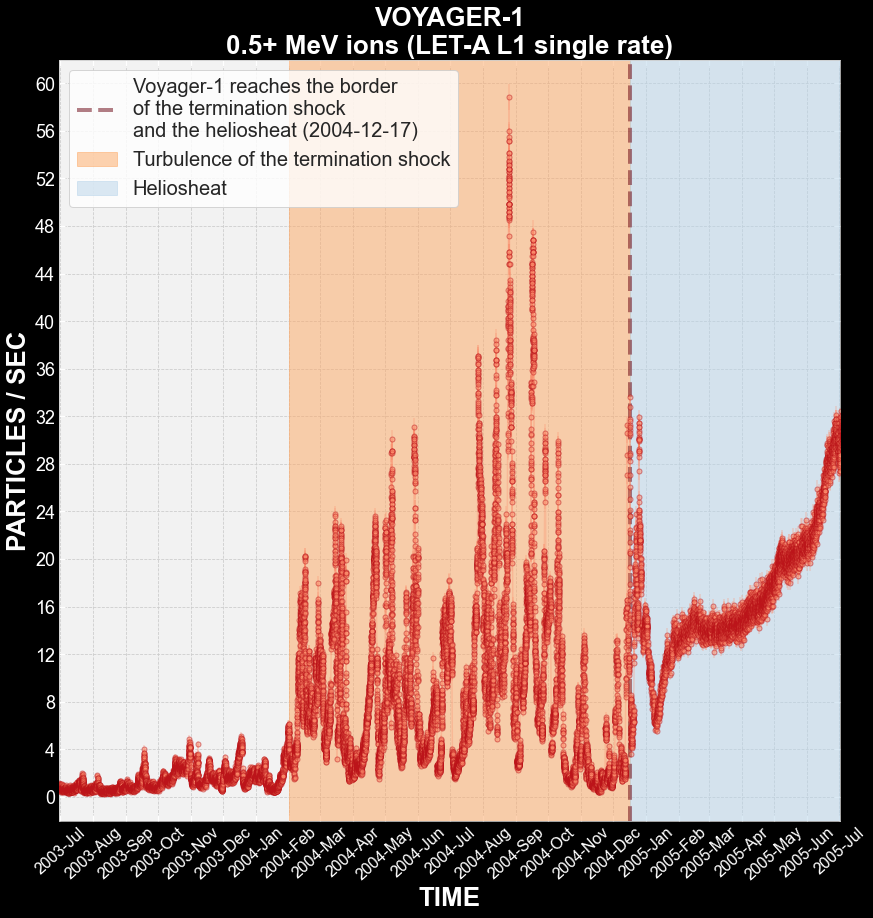

In [21]:
fig, axes = plt.subplots(figsize=(14,14),
                         facecolor='black', subplot_kw={'facecolor' : '.95'})

axes.grid(True)

cmap = cm.Reds
x = data['Time']
y = data['LA1']
y_err = data['LA1_err']
axes.errorbar(x, y, yerr=y_err,
              color=cmap(0.4), fmt='', alpha=0.3)

sr = 5
axes.scatter(x, y, s=sr**2,
             color=cmap(0.4), ec=cmap(0.8, 0.2), alpha=0.5,
             zorder=3)

axes.axvline(x=TERMSHOCK, label='Voyager-1 reaches the border\nof the termination shock\nand the heliosheat (2004-12-17)',
             color=cmap(1.0), lw=4, ls='--', alpha=0.5, zorder=2)
termshock = pd.date_range(start="2004-02-01",end='2004-12-17').to_pydatetime().tolist()
axes.fill_between(termshock, -np.max(y)*2, np.max(y)*2,
                  label='Turbulence of the termination shock',
                  color=cm.Oranges(0.4), alpha=0.5)
termshock = pd.date_range(start="2004-12-17",end='2005-07-01').to_pydatetime().tolist()
axes.fill_between(termshock, -np.max(y)*2, np.max(y)*2,
                  label='Heliosheat',
                  color=cm.Blues(0.3), alpha=0.5)

axes.set_title('VOYAGER-1\n0.5+ MeV ions (LET-A L1 single rate)',
               fontsize=axistitlesize, fontweight='bold', color='white')
axes.set_xlabel('TIME',
                fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('PARTICLES / SEC',
                fontsize=axislabelsize, fontweight='bold', color='white')

## X-ticks
# Major ticks every month
axes.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Tick parameters
axes.tick_params(axis='x', which='both',
                 colors='white', labelsize=16, rotation=42)
# Ax limits
datemin = np.datetime64('2003-07-01') - np.timedelta64(1, 'D')
datemax = np.datetime64('2005-07-01') + np.timedelta64(1, 'D')
axes.set_xlim(datemin, datemax)

## Y-ticks
# Major ticks every 0.1
loc = plticker.MultipleLocator(base=4) # this locator puts ticks at regular intervals
axes.yaxis.set_major_locator(loc)
# Tick parameters
axes.tick_params(axis='y', which='both',
                 colors='white', labelsize=18, rotation=0)
# Ax limits
axes.set_ylim(-2, 62)

axes.legend(loc='upper left', fontsize=axislegendsize-3)

plt.savefig('voyager_05mev_LET-A-L1-termshock.png',
            format='png',
            dpi=150,
            bbox_inches='tight')

plt.show()

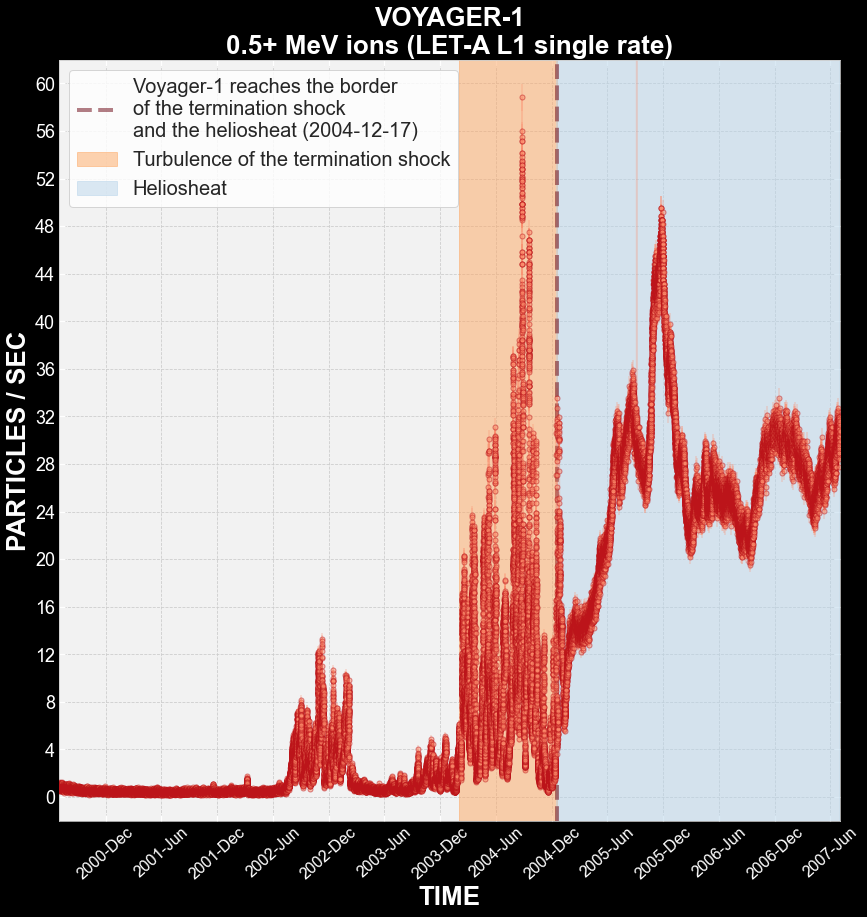

In [22]:
fig, axes = plt.subplots(figsize=(14,14),
                         facecolor='black', subplot_kw={'facecolor' : '.95'})

axes.grid(True)

cmap = cm.Reds
x = data['Time']
y = data['LA1']
y_err = data['LA1_err']
axes.errorbar(x, y, yerr=y_err,
              color=cmap(0.4), fmt='', alpha=0.3)

sr = 5
axes.scatter(x, y, s=sr**2,
             color=cmap(0.4), ec=cmap(0.8, 0.2), alpha=0.5,
             zorder=3)

axes.axvline(x=TERMSHOCK, label='Voyager-1 reaches the border\nof the termination shock\nand the heliosheat (2004-12-17)',
             color=cmap(1.0), lw=4, ls='--', alpha=0.5, zorder=2)
termshock = pd.date_range(start="2004-02-01",end='2004-12-17').to_pydatetime().tolist()
axes.fill_between(termshock, -np.max(y)*2, np.max(y)*2,
                  label='Turbulence of the termination shock',
                  color=cm.Oranges(0.4), alpha=0.5)
termshock = pd.date_range(start="2004-12-17",end='2007-07-01').to_pydatetime().tolist()
axes.fill_between(termshock, -np.max(y)*2, np.max(y)*2,
                  label='Heliosheat',
                  color=cm.Blues(0.3), alpha=0.5)

axes.set_title('VOYAGER-1\n0.5+ MeV ions (LET-A L1 single rate)',
               fontsize=axistitlesize, fontweight='bold', color='white')
axes.set_xlabel('TIME',
                fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('PARTICLES / SEC',
                fontsize=axislabelsize, fontweight='bold', color='white')

## X-ticks
# Major ticks every month
axes.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Tick parameters
axes.tick_params(axis='x', which='both',
                 colors='white', labelsize=16, rotation=42)
# Ax limits
datemin = np.datetime64('2000-07-01') - np.timedelta64(1, 'D')
datemax = np.datetime64('2007-07-01') + np.timedelta64(1, 'D')
axes.set_xlim(datemin, datemax)

## Y-ticks
# Major ticks every 0.1
loc = plticker.MultipleLocator(base=4) # this locator puts ticks at regular intervals
axes.yaxis.set_major_locator(loc)
# Tick parameters
axes.tick_params(axis='y', which='both',
                 colors='white', labelsize=18, rotation=0)
# Ax limits
axes.set_ylim(-2, 62)

axes.legend(loc='upper left', fontsize=axislegendsize-3)

plt.savefig('voyager_05mev_LET-A-L1-termshock_extended.png',
            format='png',
            dpi=150,
            bbox_inches='tight')

plt.show()